# Assignment 1

## Introduction to Data

### Dataset

The aim of this assignment is to learn how to apply the theoretical knowledge you gained in the book and video clips to real datasets. Today, you will learn how to load data, how datasets are organized, how you can summarize data, and how you can plot data. To do this, we will use the dataset `BikeRental.csv`, modified from the original source (kaggle).

Bikes can be rented and returned at specific points in the city, and the number of bikes that are rented on a day depends on a number of factors. Some potential factors are given in this dataset, which we will visualize in some plots. First we need to import some libraries.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [38]:
# For google colab
# from google.colab import files
# uploaded = files.upload()

For importing data we will use the ```pandas``` library, which has a lot of tools that are useful for data analysis. When reading in data, pandas will create a **DataFrame**. A pandas DataFrame is similar to a Python dictionairy, in the sense that each column name is a key, and the data below it are the values. The columns in the DataFrame represent the different variables and the rows represent the different cases (observations). We can see all the variables in the DataFrame by printing all the `key` values, or printing the `head/tail` of the file. One key with all its values is called a Series, this is one column in the DataFrame.

### Exercise 1

1. Read the data in ```BikeRental.csv``` into a variable ```raw_data``` and print out the keys. How many keys are there?
2. Print out the head and tail of the data.
3. For each of the following variables, write down what kind of data it is (categorical, ordinal, discrete, continuous):
season, month, weekday, working day, weather situation, temperature, windspeed, count <div style='text-align: right;'>**6 points**</div>

In [39]:
print("\033[38;2;204;36;29m" + "Solution no1" + "\033[0m")
raw_data = pd.read_csv('BikeRental.csv')
print("There are", len(raw_data.keys()), "keys:")
print("="*80)
for key in raw_data.keys():
  print(key)

# print("\n" + "\033[38;2;204;36;29m" + "Solution no2" + "\033[")
# print("There are ",len(raw_data.columns), "keys")
# print("="*80)

Solution no1
There are 13 keys:
date
season
year
month
weekday
hour
workingday
weathersit
temperature
feeling temperature
humidity
windspeed
count


In [40]:
print("Head:")
print("="*80)
raw_data.head()

Head:


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01-01-11,1,0,1,6,0,0,1,9.84,14.395,81,0.0,16
1,01-01-11,1,0,1,6,1,0,1,9.02,13.635,80,0.0,40
2,01-01-11,1,0,1,6,2,0,1,9.02,13.635,80,0.0,32
3,01-01-11,1,0,1,6,3,0,1,9.84,14.395,75,0.0,13
4,01-01-11,1,0,1,6,4,0,1,9.84,14.395,75,0.0,1


In [41]:
print("Tail:")
print("="*80)
raw_data.tail()

Tail:


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
17374,31-12-12,1,1,12,1,19,1,2,10.66,12.880,60,11.0014,119
17375,31-12-12,1,1,12,1,20,1,2,10.66,12.880,60,11.0014,89
17376,31-12-12,1,1,12,1,21,1,1,10.66,12.880,60,11.0014,90
17377,31-12-12,1,1,12,1,22,1,1,10.66,13.635,56,8.9981,61
17378,31-12-12,1,1,12,1,23,1,1,10.66,13.635,65,8.9981,49


### Categories

- **date**: ordinal  
- **season**: categorical  
- **year**: discrete  
- **month**: ordinal  
- **weekday**: categorical  
- **hour**: discrete  
- **workingday**: categorical  
- **weather sit**: categorical
- **temperature**: continuous  
- **feeling temperature**: continuous  
- **humidity**: discrete 
- **windspeed**: continuous  
- **count**: discrete  

*Our categories are also based on the values we found in the data and our real-world understanding



### Exercise 2
A good first step in any analysis is to distill the information in all the cases to a few summary statistics and graphics. As a simple example, the function ```describe``` returns a numerical summary: count, mean, standard deviation, minimum, first quartile, median, second quartile, and maximum. Python also has built-in functions to compute summary statistics one by one, such as the functions ```mean``` or ```max```.

1. Use the ```describe``` function to summarize the data for temperature. What is the mean and standard deviation?
2. Use the ```mean``` function to confirm the value in 1. above.
3. Calculate the IQR of the feeling temperature and of windspeed (and print both of them).
4. For categorical data, it makes more sense to look at the sample frequency or relative frequency distribution. The function ```value_counts``` does this for you by counting the number of times each kind of response was given. Extract the number of cases that were recorded in the different seasons. <div style='text-align: right;'>**6 points**</div>

In [42]:
# your code/answer here
print(raw_data["temperature"].describe())

count    17379.000000
mean        20.376474
std          7.894801
min          0.820000
25%         13.940000
50%         20.500000
75%         27.060000
max         41.000000
Name: temperature, dtype: float64


In [43]:
# your code/answer here
print(raw_data["temperature"].mean())

20.37647390528799


In [44]:
# your code/answer here
#The IQR （Interquartile Range） describes the middle 50% of values when ordered from lowest to highest.
#When we split the data by four parts, it can be divided each 25%.
#Q1 means the value that counting from the bottom of the data “25%”.
#Q3 means counting from the bottom of the data "75%".
#Why 25% and 75%? because we only want to focus on the middle range of 50% data.
#Here is IQR foumula :  IQR ＝ 75% (Q3)　− 25% (Q1)

#Here is code
#In case of feeling temperature.
q1_f = raw_data["feeling temperature"].quantile(0.25)
q3_f = raw_data["feeling temperature"].quantile(0.75)
IQR_f = q3_f -q1_f 
print(IQR_f)

#In case of windspeed.
q1_w = raw_data["windspeed"].quantile(0.25)
q3_w = raw_data["windspeed"].quantile(0.75)
IQR_w = q3_w -q1_w
print(IQR_w)

14.395
9.996400000000001


In [45]:
# your code/answer here
print(raw_data["season"].value_counts())

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64


### Exercise 3


To answer specific questions about the data, it is important that we can zoom in on different parts of the data. For example, we want to look at all the non-working days where the temperature was higher than 10°C. We can do that as follows:

In [46]:
# with multiple conditions the brackets around each condition are necessary!
no_work_temp_over_10 = raw_data[(raw_data['workingday'] == 0) & (raw_data['temperature'] > 10)]

print("Number of items in subset:", no_work_temp_over_10.shape[0])
print("Number of items in all data:", raw_data.shape[0])
no_work_temp_over_10.head()

Number of items in subset: 4787
Number of items in all data: 17379


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
9,01-01-11,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14
10,01-01-11,1,0,1,6,10,0,1,15.58,19.695,76,16.9979,36
11,01-01-11,1,0,1,6,11,0,1,14.76,16.665,81,19.0012,56
12,01-01-11,1,0,1,6,12,0,1,17.22,21.210,77,19.0012,84
13,01-01-11,1,0,1,6,13,0,2,18.86,22.725,72,19.9995,94


As can be seen above, it is often useful to extract all individuals (cases) in a data set that have specific characteristics. We accomplish this through conditioning commands. Look at the two following expressions used in the previous piece of code:

In [47]:
raw_data['workingday'] == 0

0         True
1         True
2         True
3         True
4         True
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: workingday, Length: 17379, dtype: bool

In [48]:
raw_data['temperature'] > 10

0        False
1        False
2        False
3        False
4        False
         ...  
17374     True
17375     True
17376     True
17377     True
17378     True
Name: temperature, Length: 17379, dtype: bool

These commands produce a series of TRUE and FALSE values. There is one value for each respondent, where TRUE indicates that it was a non-working day (via the first command) or the temperature was higher than 10 (second command).

Therefore, to extract all the non-working days where the temperature was higher than 10°C, the following command was used:

In [49]:
raw_data[(raw_data['workingday'] == 0) & (raw_data['temperature'] > 10)]

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
9,01-01-11,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14
10,01-01-11,1,0,1,6,10,0,1,15.58,19.695,76,16.9979,36
11,01-01-11,1,0,1,6,11,0,1,14.76,16.665,81,19.0012,56
12,01-01-11,1,0,1,6,12,0,1,17.22,21.210,77,19.0012,84
13,01-01-11,1,0,1,6,13,0,2,18.86,22.725,72,19.9995,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17345,30-12-12,1,1,12,0,14,0,1,12.30,13.635,36,31.0009,160
17346,30-12-12,1,1,12,0,15,0,1,11.48,12.880,38,22.0028,138
17347,30-12-12,1,1,12,0,16,0,1,11.48,12.120,38,27.9993,133
17348,30-12-12,1,1,12,0,17,0,1,10.66,11.365,41,22.0028,123


We can also look at specific cases in our data by indexing our DataFrame. For example, if we want all of the data for the first 10 respondents, we can use the `iloc` function of the dataframe.

In [50]:
raw_data.iloc[0:10,:]

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01-01-11,1,0,1,6,0,0,1,9.84,14.395,81,0.0000,16
1,01-01-11,1,0,1,6,1,0,1,9.02,13.635,80,0.0000,40
2,01-01-11,1,0,1,6,2,0,1,9.02,13.635,80,0.0000,32
3,01-01-11,1,0,1,6,3,0,1,9.84,14.395,75,0.0000,13
4,01-01-11,1,0,1,6,4,0,1,9.84,14.395,75,0.0000,1
5,01-01-11,1,0,1,6,5,0,2,9.84,12.880,75,6.0032,1
6,01-01-11,1,0,1,6,6,0,1,9.02,13.635,80,0.0000,2
7,01-01-11,1,0,1,6,7,0,1,8.20,12.880,86,0.0000,3
8,01-01-11,1,0,1,6,8,0,1,9.84,14.395,75,0.0000,8
9,01-01-11,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14


Similarly, we can look at the season of each observation by typing:

In [51]:
# Here we want to print one column, the season column, so we could also say raw_data.iloc[:,1], but since we
# want it printed in a nice table, we can refer to the first column with raw_data.iloc[:,1:2].

raw_data.iloc[:,1:2]

,season
0,1
1,1
2,1
3,1
4,1
...,...
17374,1
17375,1
17376,1
17377,1


Or just type the column name of the one that you want to print.

In [52]:
raw_data['season']

0        1
1        1
2        1
3        1
4        1
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: season, Length: 17379, dtype: int64

Now create subsets for the following requirements, give them appropriate names, and print their head:

1. Season of Spring and Summer, only from Monday to Wednesday
2. Working day from 08:00 to 20:00, or a non-working day
3. Light rainy holidays (excluding holidays during the weekend)
4. Monday to Friday, with holidays, that had more than 20 bikes rented
5. The last 10 cases in the dataset <div style='text-align: right;'>**9 points**</div>

In [53]:
spring_summer_from_monday_to_wednesday = raw_data[((raw_data['season'] == 2) | (raw_data['season'] == 3) ) & ( (raw_data['weekday'] == 3) | (raw_data['weekday'] == 1) | (raw_data['weekday'] == 2))]
spring_summer_from_monday_to_wednesday

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
1807,21-03-11,2,0,3,1,0,1,3,13.94,15.150,66,26.0027,13
1808,21-03-11,2,0,3,1,1,1,2,13.94,15.150,71,26.0027,7
1809,21-03-11,2,0,3,1,2,1,2,13.94,15.150,71,22.0028,6
1810,21-03-11,2,0,3,1,3,1,2,13.94,15.150,71,22.0028,1
1811,21-03-11,2,0,3,1,5,1,1,13.12,15.150,81,19.9995,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,19-09-12,3,1,9,3,19,1,1,22.96,26.515,43,15.0013,611
14943,19-09-12,3,1,9,3,20,1,1,21.32,25.000,48,11.0014,409
14944,19-09-12,3,1,9,3,21,1,1,20.50,24.240,59,11.0014,349
14945,19-09-12,3,1,9,3,22,1,1,20.50,24.240,63,6.0032,229


In [54]:
working_from_820_or_non_working = raw_data[(( raw_data['hour'] > 8) & (raw_data['hour'] < 20) & (raw_data['workingday'] == 1)) | (raw_data['workingday'] == 0)]
working_from_820_or_non_working

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01-01-11,1,0,1,6,0,0,1,9.84,14.395,81,0.0000,16
1,01-01-11,1,0,1,6,1,0,1,9.02,13.635,80,0.0000,40
2,01-01-11,1,0,1,6,2,0,1,9.02,13.635,80,0.0000,32
3,01-01-11,1,0,1,6,3,0,1,9.84,14.395,75,0.0000,13
4,01-01-11,1,0,1,6,4,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,31-12-12,1,1,12,1,15,1,2,11.48,14.395,45,8.9981,315
17371,31-12-12,1,1,12,1,16,1,2,10.66,12.880,48,12.9980,214
17372,31-12-12,1,1,12,1,17,1,2,10.66,14.395,48,6.0032,164
17373,31-12-12,1,1,12,1,18,1,2,10.66,13.635,48,8.9981,122


In [55]:
light_rain_holiday = raw_data[(raw_data['weathersit'] == 3) & (raw_data['workingday'] == 0) & (raw_data['weekday'] != 0) & (raw_data['weekday'] != 6)]
light_rain_holiday

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
391,17-01-11,1,0,1,1,19,0,3,7.38,9.090,59,12.9980,60
392,17-01-11,1,0,1,1,20,0,3,6.56,7.575,80,12.9980,33
393,17-01-11,1,0,1,1,21,0,3,6.56,7.575,80,12.9980,27
394,17-01-11,1,0,1,1,22,0,3,5.74,6.060,93,16.9979,13
395,17-01-11,1,0,1,1,23,0,3,6.56,6.820,86,19.0012,4
1170,21-02-11,1,0,2,1,13,0,3,12.30,13.635,81,22.0028,103
1173,21-02-11,1,0,2,1,16,0,3,11.48,12.120,75,27.9993,56
1177,21-02-11,1,0,2,1,20,0,3,9.84,10.605,81,26.0027,29
1178,21-02-11,1,0,2,1,21,0,3,9.02,9.850,75,30.0026,34
1179,21-02-11,1,0,2,1,22,0,3,8.20,8.335,75,27.9993,11


In [56]:
monday_to_friday_holidays_20plus = raw_data[(raw_data['weekday'] >= 1) & (raw_data['weekday'] <= 5)& (raw_data['count'] > 20) & (raw_data['workingday'] == 0)]
monday_to_friday_holidays_20plus 

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
380,17-01-11,1,0,1,1,8,0,2,6.56,7.575,47,15.0013,33
381,17-01-11,1,0,1,1,9,0,2,6.56,7.575,47,15.0013,47
382,17-01-11,1,0,1,1,10,0,2,6.56,7.575,50,16.9979,57
383,17-01-11,1,0,1,1,11,0,2,6.56,7.575,55,12.9980,64
384,17-01-11,1,0,1,1,12,0,2,7.38,9.850,47,8.9981,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17229,25-12-12,1,1,12,2,18,0,2,13.12,15.150,66,16.9979,43
17230,25-12-12,1,1,12,2,19,0,2,13.12,15.150,66,15.0013,36
17231,25-12-12,1,1,12,2,20,0,2,13.12,15.150,66,19.0012,40
17232,25-12-12,1,1,12,2,21,0,2,12.30,14.395,65,12.9980,34


In [57]:
last_10_cases = raw_data.tail(10)
last_10_cases

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
17369,31-12-12,1,1,12,1,14,1,2,11.48,13.635,45,15.0013,247
17370,31-12-12,1,1,12,1,15,1,2,11.48,14.395,45,8.9981,315
17371,31-12-12,1,1,12,1,16,1,2,10.66,12.880,48,12.9980,214
17372,31-12-12,1,1,12,1,17,1,2,10.66,14.395,48,6.0032,164
17373,31-12-12,1,1,12,1,18,1,2,10.66,13.635,48,8.9981,122
17374,31-12-12,1,1,12,1,19,1,2,10.66,12.880,60,11.0014,119
17375,31-12-12,1,1,12,1,20,1,2,10.66,12.880,60,11.0014,89
17376,31-12-12,1,1,12,1,21,1,1,10.66,12.880,60,11.0014,90
17377,31-12-12,1,1,12,1,22,1,1,10.66,13.635,56,8.9981,61
17378,31-12-12,1,1,12,1,23,1,1,10.66,13.635,65,8.9981,49


### Exercise 4
If we are interested in the distribution of weather over each weekday, we can use the `groupby` command

In [58]:
weekday = raw_data.groupby('weekday')['weathersit'].value_counts().unstack()

weekday

weathersit,1,2,3,4
weekday,,,,
0,1765.0,568.0,169.0,NaN
1,1582.0,726.0,170.0,1.0
2,1522.0,694.0,237.0,NaN
3,1568.0,613.0,293.0,1.0
4,1656.0,636.0,179.0,NaN
5,1645.0,659.0,183.0,NaN
6,1675.0,648.0,188.0,1.0


By doing ```unstack``` we are transforming the last level of the index to the columns. All the weather situation values are now the columns of the dataframe and when a weather situation has not occurred on a weekday, the correcponding position in the table gets a ```NaN``` value. For example the table above shows that there is no Wednesday with heavy rain in the dataset.

Now create groups for the following criteria, and print their table:

1. Season and working days. Interpret, in words, what the first row of the table shows.
2. Month and temperature in 10 sections (hint, use the pandas function `pd.cut()` to create bins of continuous data)<div style='text-align: right;'>**4 points**</div>

In [59]:
season = raw_data.groupby(["season", "workingday"]).value_counts().unstack()
season


#Explanaiton
#The first row shows season=1 (winter) and workingday=0 (non-working day).
##The weathersit values range is 1 to 4 that indicates Clear=(1), Cloudy=(2), Rain=(3), Heavy Rain=(4)

#This is the first row
# 0 | 1765.0 | 568.0 | 169.0 | NaN 

#Therefore, the first row of the table shows clear weather occurred 1765 times, cloudy conditions occurred 568 times during winter non-working days.
#On the other hand, Rain occurred 169 times, and heavy rain never happened (NaN) during winter holidays.

count                                                                                                             1    \
season workingday date     year month weekday hour weathersit temperature feeling temperature humidity windspeed        
1      0          01-01-11 0    1     6       0    1          9.84        14.395              81       0.0000     NaN   
                                              1    1          9.02        13.635              80       0.0000     NaN   
                                              2    1          9.02        13.635              80       0.0000     NaN   
                                              3    1          9.84        14.395              75       0.0000     NaN   
                                              4    1          9.84        14.395              75       0.0000     1.0   
...                                                                                                               ...   
4      1          31-10-12 1    10    3       19   2          16.40       20.455              50       12.9980    NaN   
                                              20   2          16.40       20.455              50       12.9980    NaN   
                                              21   2          16.40       20.455              50       12.9980    NaN   
                                              22   1          14.76       17.425              57       8.9981     NaN   
                                              23   1          14.76       18.180              57       6.0032     NaN   

count                                                                                                             2    \
season workingday date     year month weekday hour weathersit temperature feeling temperature humidity windspeed        
1      0          01-01-11 0    1     6       0    1          9.84        14.395              81       0.0000     NaN   
                                              1    1          9.02        13.635              80       0.0000     NaN   
                                              2    1          9.02        13.635              80       0.0000     NaN   
                                              3    1          9.84        14.395              75       0.0000     NaN   
                                              4    1          9.84        14.395              75       0.0000     NaN   
...                                                                                                               ...   
4      1          31-10-12 1    10    3       19   2          16.40       20.455              50       12.9980    NaN   
                                              20   2          16.40       20.455              50       12.9980    NaN   
                                              21   2          16.40       20.455              50       12.9980    NaN   
                                              22   1          14.76       17.425              57       8.9981     NaN   
                                              23   1          14.76       18.180              57       6.0032     NaN   

count                                                                                                             3    \
season workingday date     year month weekday hour weathersit temperature feeling temperature humidity windspeed        
1      0          01-01-11 0    1     6       0    1          9.84        14.395              81       0.0000     NaN   
                                              1    1          9.02        13.635              80       0.0000     NaN   
                                              2    1          9.02        13.635              80       0.0000     NaN   
                                              3    1          9.84        14.395              75       0.0000     NaN   
                                              4    1          9.84        14.395              75       0.0000     NaN   
...  

In [60]:
# Temperature
# pd.cut(raw_data["temperature"],bins=10)

# Split the temperature into 10 groups and create a new column called "bins" that contains the new temperature zone
raw_data["bins"] = pd.cut(raw_data["temperature"],bins=10)
# Group the data by month and count the number of cases in each temperature zone
result = raw_data.groupby("month")["bins"].value_counts().unstack()

# Display the result with pandas instead of printing
result

bins,"(0.78, 4.838]","(4.838, 8.856]","(8.856, 12.874]","(12.874, 16.892]","(16.892, 20.91]","(20.91, 24.928]","(24.928, 28.946]","(28.946, 32.964]","(32.964, 36.982]","(36.982, 41.0]"
month,,,,,,,,,,
1,86,558,478,199,97,11,0,0,0,0
2,31,209,503,399,148,44,7,0,0,0
3,0,74,348,436,348,192,66,9,0,0
4,0,0,74,406,452,320,153,32,0,0
5,0,0,0,34,231,578,454,163,28,0
6,0,0,0,0,29,273,590,398,133,17
7,0,0,0,0,0,43,435,618,326,66
8,0,0,0,0,0,91,695,559,129,1
9,0,0,0,6,137,504,599,182,9,0


### Exercise 5

Plotting your data (correctly) is very important. There are many possible plots you could use and some are better than others for a given dataset or data type. To create nice plots, we will be using the `Seaborn` library, which is based on Matplotlib. In the very first cell of this notebook, where we imported libraries, we already included this library with `import seaborn as sns`. Below are some examples of use.

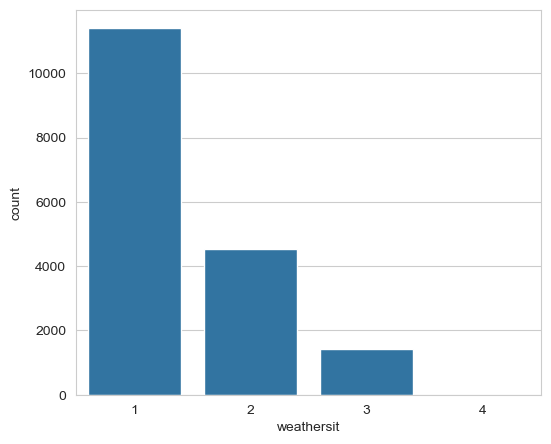

In [61]:
plt.figure(figsize=(6,5))
sns.countplot(x=raw_data['weathersit'])
plt.show()

<Figure size 800x500 with 0 Axes>

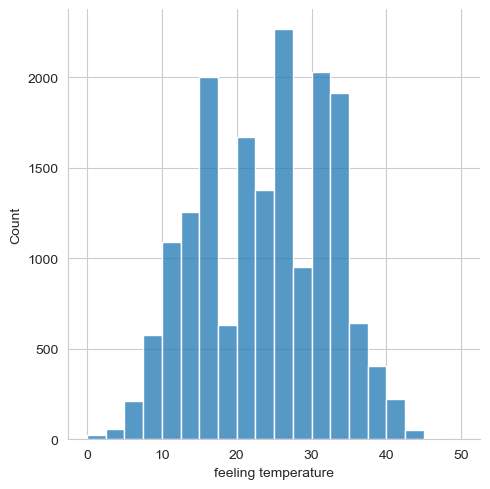

In [62]:
plt.figure(figsize=(8,5))
sns.displot(x=raw_data['feeling temperature'], kde=False, rug=False, bins = 20)
# kde: Kernel Density Estimation would show a distribution line of the data
# rug: shows the individual data points with small vertical lines on the x-axis
# bins: number of bins to use for the histogram
plt.show()

We can construct a box plot for a single variable with the following snippet:

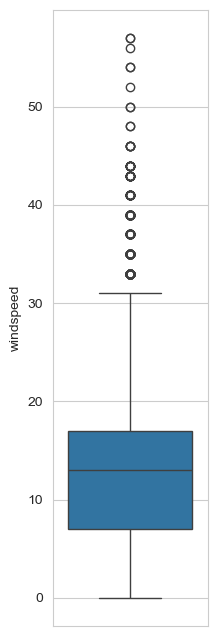

In [63]:
plt.figure(figsize=(2,8))
sns.boxplot(y = raw_data['windspeed'])
plt.show()

The purpose of a boxplot is to provide a thumbnail sketch of a variable for the purpose of comparing across several categories. So we can, for example, compare the temperature across the four seasons like this:

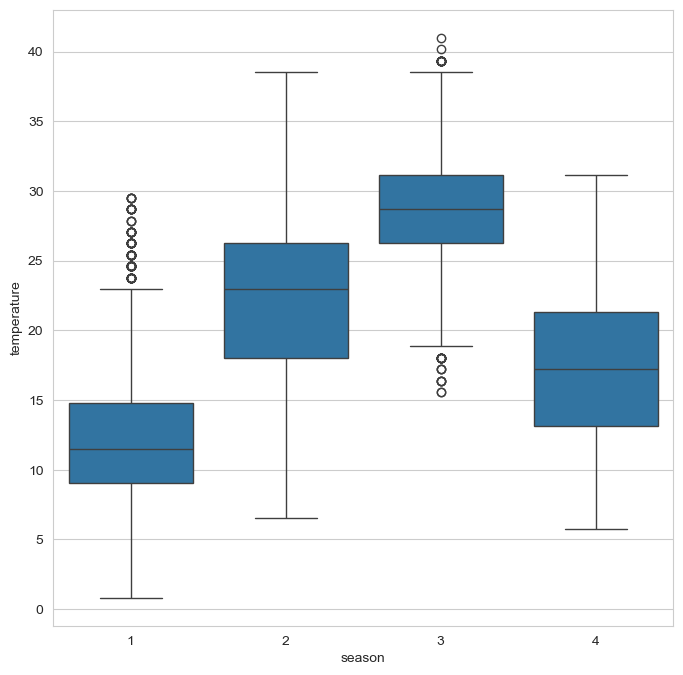

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(x = raw_data['season'], y = raw_data['temperature'])
plt.show()

For visualization of associations, we usually use scatter plots. For example, let's plot the scatter plot of the number of bikes rented versus temperature:

Text(0.5, 1.0, 'Count vs Temperature')

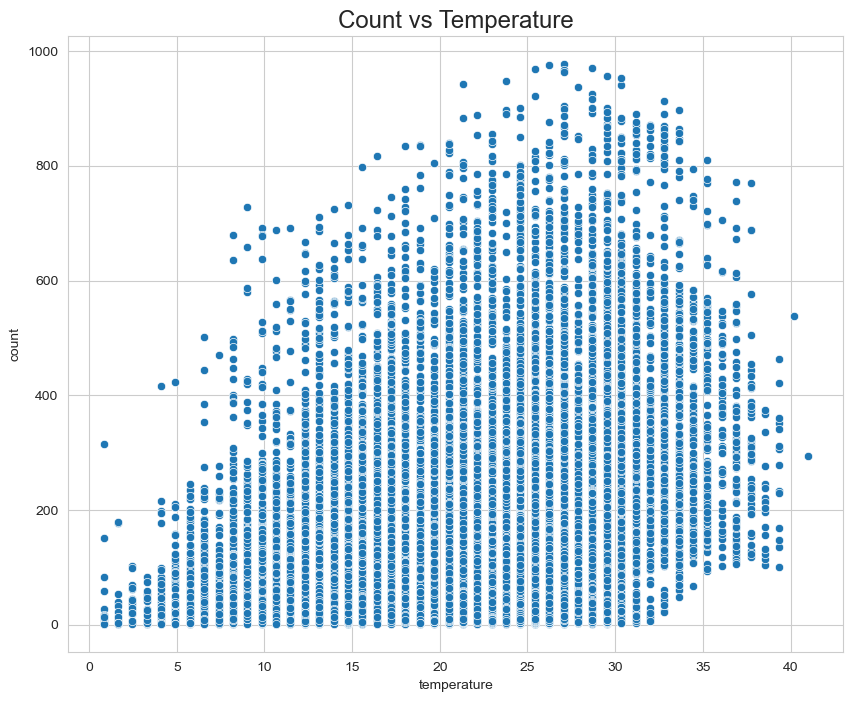

In [65]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = raw_data['temperature'], y = raw_data['count'])
plt.title("Count vs Temperature", fontsize = "xx-large")

Looking at the scatter plot of the number of rented bikes versus temperature, what can we say about the association between these two variables?  As the temperature increases, the number of rented bikes increases but at around 27 degrees, rentals begin to decrease again. Thus, bike rentals and temperature are associated.

Now let's look at the scatter plot of the number of rented bikes versus season:

Text(0.5, 1.0, 'Count vs Season')

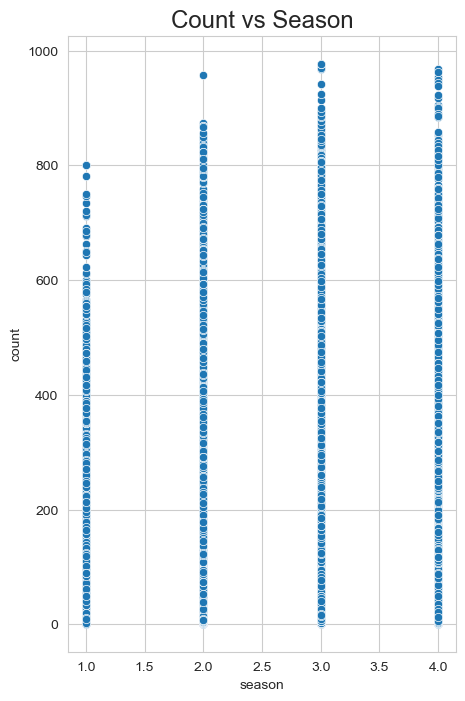

In [66]:
plt.figure(figsize=(5,8))
sns.scatterplot(x = raw_data['season'], y = raw_data['count'])
plt.title("Count vs Season", fontsize = "xx-large")

As can be seen in the plot, it is hard to assess association as the explanatory variable is categorical. In cases like this, a box plot makes it easier to search for association:

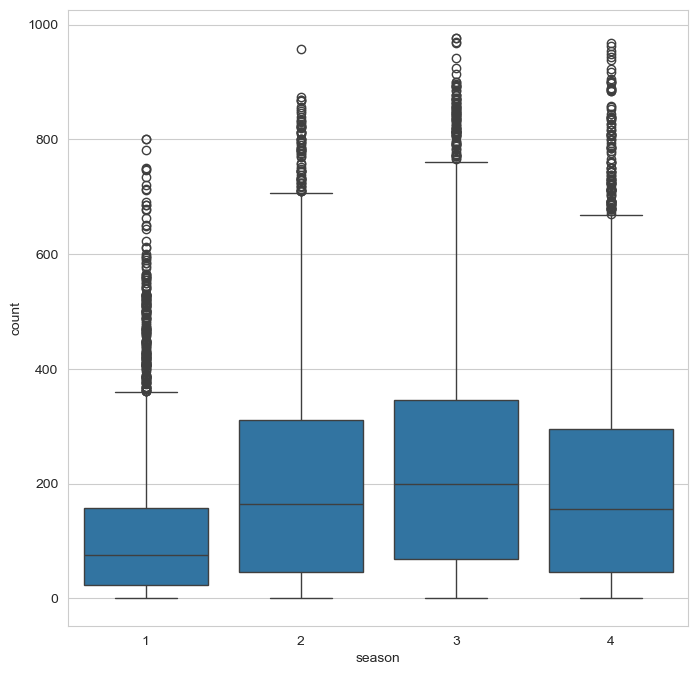

In [67]:
plt.figure(figsize=(8,8))
sns.boxplot(x = raw_data['season'], y = raw_data['count'])
plt.show()

In the above plot, it can be seen that the number of rented bikes is associated with the season as the median of the count changes with different seasons.

Now it is time for you to create some plots! Use the pandas documentation to see the different kinds of plots you can use, as well as more options. Answer the following questions, and motivate your answers with plots.

1. What do you think is more strongly associated with the number of rented bikes, the weather situation, or the feeling temperature being lower/higher than 35? (Note: you can use two box plots, one for each variable, and compare associations)
2. Are more bikes rented on non-working days vs working days?
3. Is there an association between the feeling temperature and humidity?
4. Which month has the largest total number of bike rentals? (Note: you can use "sns.barplot(x = , y = ,...)" to make a bar plot)
5. Can you figure out which of the four variables: temperature, feeling temperature, humidity, and windspeed, are most strongly associated with the number of rented bikes?   <div style='text-align: right;'>**10 points**</div>



Corr Feeling Temp > Corr Weather Situation
|0.1993|          >              |-0.1424|


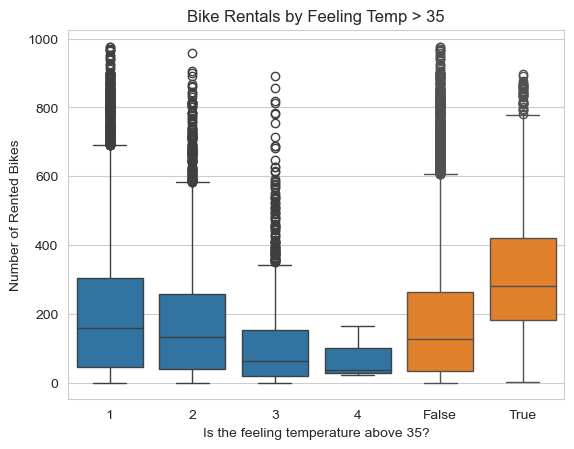

In [68]:
# 1
# new bool column to categorize feeling temperature as > 35 or <= 35
raw_data["temp_above_35"] = raw_data["feeling temperature"] > 35



# weather situation vs bike count
sns.boxplot(x=raw_data["weathersit"], y=raw_data["count"])
plt.title("Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Number of Rented Bikes")

# temperature above/below 35 vs bike count
sns.boxplot(x=raw_data["temp_above_35"], y=raw_data["count"])
plt.title("Bike Rentals by Feeling Temp > 35")
plt.xlabel("Is the feeling temperature above 35?")
plt.ylabel("Number of Rented Bikes")
# somehow it combines the two plots, nice :)


# Both the weather situation and the feeling temperature are associated with the number of rented bikes.
# However the feeling temperature shows a stronger association as the median of rented bikes is almost double when the ft is above 35 compared to when it is below 35.
# The weather situation also shows a trend of lower rentals as the weather worsens wbut it is not as dramatic. 

# This can be confirmed by checking which correlation value is higher:
corr_value_weather = raw_data['count'].corr(raw_data['weathersit'])
corr_value_temp = raw_data['count'].corr(raw_data['temp_above_35'])

# to get the length of the text:
# print(len("Corr Feeling Temp")) = 17
# print(len("Corr Weather Situation")) = 22


text = "Corr Feeling Temp > Corr Weather Situation\n"
numbers = f"|{corr_value_temp:.4f}|".ljust(17) + " > " + f"|{corr_value_weather:.4f}|".rjust(22)
print(text + numbers)

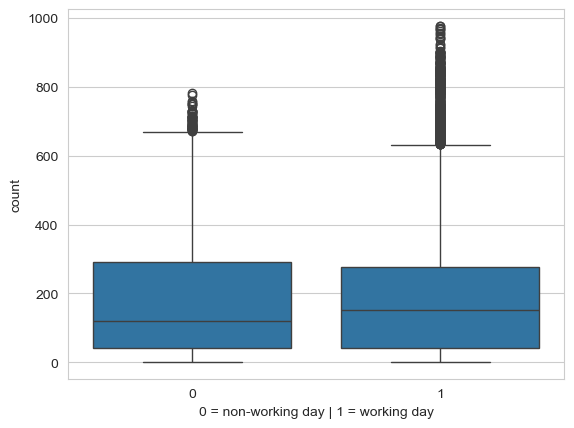

In [69]:
# 2
# your code/answer here
sns.boxplot(x = raw_data["workingday"],y = raw_data["count"])
plt.xlabel("0 = non-working day | 1 = working day")
plt.show()

#From below graph, I can see working day is slightly higher than working day
#The answer si more bikes are rented on working day.
#However, there is wide point cloud variation and it suggests a lot of irregular values.

Text(0, 0.5, 'humidity')

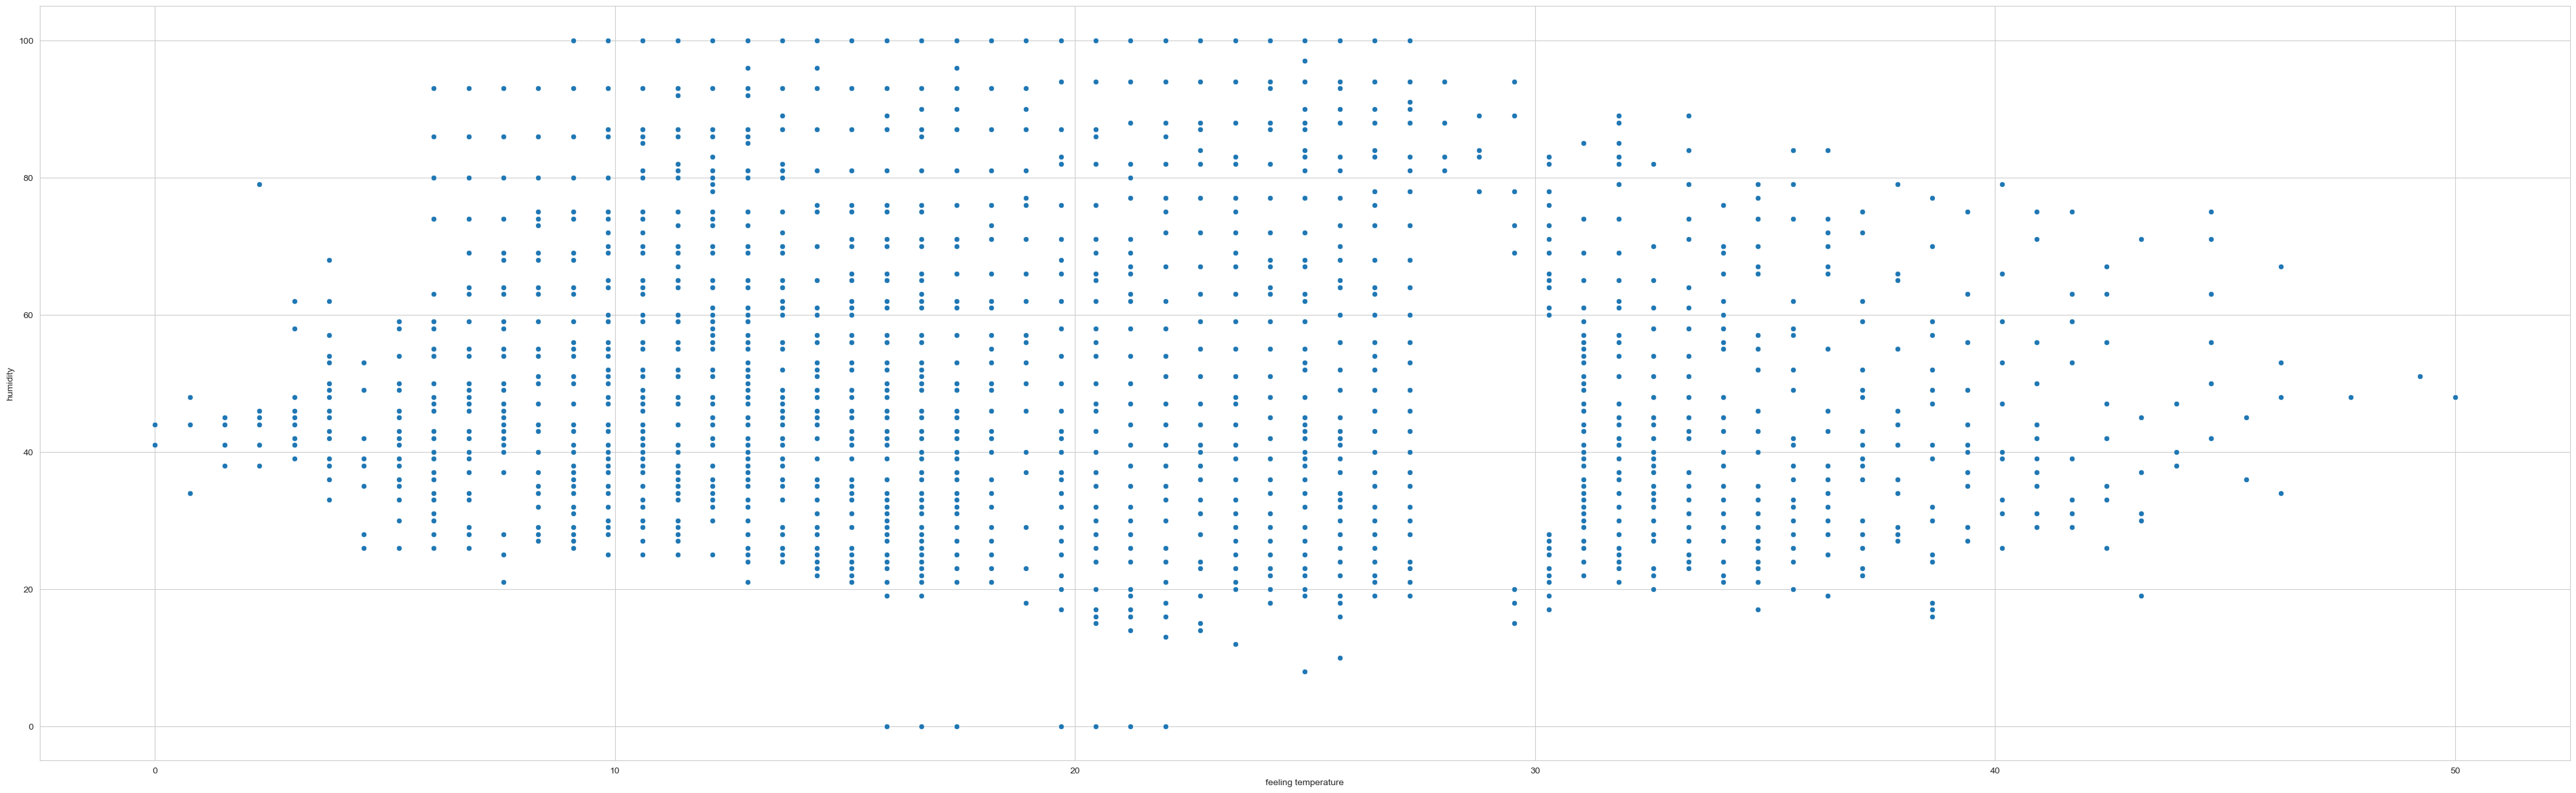

In [ ]:
# 3

plt.figure(figsize=(50,15))
sns.boxplot(x=raw_data["feeling temperature"],y = raw_data["humidity"])

plt.xlabel("feeling temperature")
plt.ylabel("humidity")

#Association between the feeling temperature and humidity
#The range between 10℃ to 27℃, median of humidity tends to be high.
#But after 28℃, humidity goes down gradually.
#Therefore, association is not linear, but slack non-linear.

highest month is  8
total bike rental is  351194


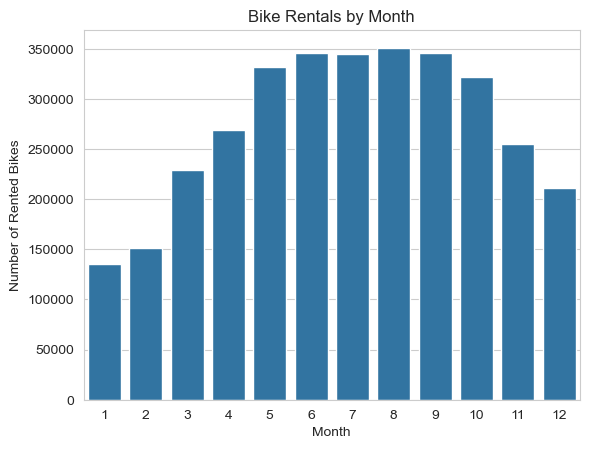

In [71]:
# 4
# Month with the highest number of bike rentals

# month_total = raw_data grouped by month and the sum of the count with the index reset, meaning the month is a normal column again
month_total = raw_data.groupby("month")["count"].sum().reset_index()

# sns barplot with the months on the x axis and the count on the y axis, the data is the month_total
#sns.barplot(x="raw_data["month"]", y=raw_data["count"], data=month_total)
sns.barplot(x="month", y="count", data=month_total)
plt.title("Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Number of Rented Bikes")

highest = month_total.loc[ month_total["count"].idxmax()]
print("highest month is ",highest["month"] )
print("total bike rental is ", highest["count"])

In [72]:
# Variables i'm checking
values = ["temperature", "feeling temperature", "humidity", "windspeed"]

abs_corr_values = []

for value in values:
    # for each item in values, calculate the correlation
    corr_value = raw_data['count'].corr(raw_data[value])
    # save the absolute value to the list
    abs_corr_values.append(abs(corr_value))

# print the values 
for i, value in enumerate(values):
    print(f"{value}: {abs_corr_values[i]:.3f}")

# print the result
print(f"\nThe max corr value has {values[abs_corr_values.index(max(abs_corr_values))]} with a value of {max(abs_corr_values):.3f}")

temperature: 0.405
feeling temperature: 0.401
humidity: 0.323
windspeed: 0.093

The max corr value has temperature with a value of 0.405
